# Ajuste de funções

Uma das principais tarefas de um cientista consiste em comparar dados experimentais (ou observacionais no caso da astrofísica) com modelos desenvolvidos por teóricos. Os modelos em geral consistem de equações matemáticas que pretendem prever algum aspecto de um fenomeno. Precisamos então desenvolver ferramentas que nos ajudem a decidir sobre quão bem um modelo explica um dado conjunto de dados experimentais.

Em muitos casos em um conjunto de dados, a incerteza é diferente para diferentes pontos. Nesses casos, nós gostaríamos de ponderar os dados que tem menor incerteza mais fortemente do que aqueles dados que têm maior incerteza. Para este caso existe um método padrão de ponderação apropriado que é conhecido como $\chi^2$ (ou qui-quadrado). Neste método supõe-se que associada a cada ponto $(x_{i},y_{i})$ dos dados há uma incerteza no valor de $Y_{i}$ de $\pm \sigma_{i}$. Neste caso, o "melhor ajuste" é definido como o conjunto de parâmetros de ajuste que minimiza a soma:

$\chi^2 = \sum_{i} \left(\frac{y_{i} - f(x_{i})} {\sigma_{i}}\right)^2 $

Veja no link https://pt.wikipedia.org/wiki/Chi-quadrado mais detalhes sobre esse critério.

O método acima para ajuste de funções pode ser usado somente se a função pode ser transformada em uma função linear nos parâmetros de ajuste a, b, c ... Quando temos uma função de ajuste não-linear que não pode ser transformada numa forma linear, aplica-se uma outra abordagem.

O problema de encontrar os valores de parâmetros de ajuste que minimizam $\chi^2$ é um problema de optimização não linear para o qual não existe geralmente nenhuma solução analítica (em contraste com o problema de optimização linear). Podemos ganhar alguns insights sobre este problema de otimização não-linear, ou seja, determinação de uma função não-linear adequada para um conjunto de dados, considerando-se uma função de ajuste com apenas dois parâmetros. Ou seja, estamos tentando ajustar algum conjunto de dados $\{x_{i}, y_{i}\}$, com incertezas em $\{y_{i}\}$ de $\{\sigma_{i}\}$, usando uma função $f(x, a, b)$ em que a e b são os dois parâmetros de ajuste. Para fazer isso, precisamos achar o mínimo em:

$\chi^2 (a, b) = \sum_{i} \left( \frac{y_{i}-f(x_{i})} {\sigma_{i}} \right)^2 $ ;.

Note-se que uma vez que o conjunto de dados, incertezas, e a função de montagem são especificadas, $\chi^2(a, b)$ é simplesmente uma função de a e b. Podemos imaginar essa função com uma paisagem com picos e vales: como nós variamos a e b, $\chi^2(a, b)$ sobe e desce. A idéia básica de todas as rotinas de ajuste não-linear é começar com algumas estimativas iniciais para os parâmetros de ajuste, aqui a e b, e posteriormente explorar paisagem de $\chi^2(a, b)$, tentando encontrar os valores de a e b que a minimizam.



[2.5510204081632653, 0.9183673469387754]


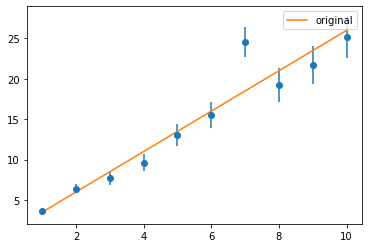

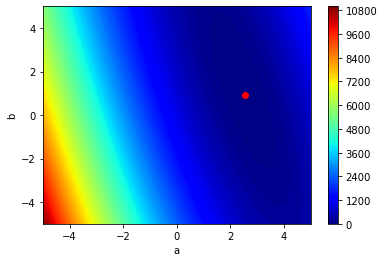

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def line(x,a,b):
    return a*x+b

# define alguns dados
num_points = 10
xdata = np.linspace(1., 10., num_points)
ydata = 2.5*xdata + 1.
yerr = 0.1 * ydata

ydata = ydata + np.random.randn(num_points) * yerr      

plt.errorbar(xdata, ydata, yerr=yerr, fmt='o')

# plota a linha real de onde os pontos foram gerados
plt.plot(xdata, 2.5*xdata + 1., label='original')
plt.legend()

grid_pts = 50
apar = np.linspace(-5,5, grid_pts)
bpar = np.linspace(-5,5, grid_pts)

chi2 = np.zeros((grid_pts,grid_pts))

min_chi2 = 10000
best = []
for i in range(grid_pts):
    for j in range(grid_pts):
        chi2[i,j] = np.sum( (ydata-line(xdata,apar[i],bpar[j]))**2/yerr**2 )

        # achar o valor minimo de chi2
        if (chi2[i,j] < min_chi2):
            min_chi2 = chi2[i,j]
            best = [apar[i],bpar[j]]
print(best)      

# como em python as matrizes são construidas com [linhas, colunas], para plotar 
# a imagem do espaço de chi2 precisamos transpor a matriz para para corresponder
# a-> x e b->y

plt.figure()  
plt.contourf(apar,bpar,chi2.T,120,cmap='jet')
plt.colorbar()
plt.plot(best[0], best[1],'or')
plt.xlabel('a')
plt.ylabel('b')
plt.show()

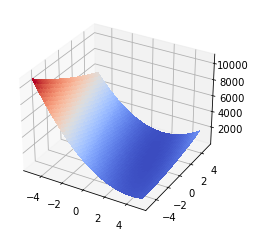

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

%matplotlib inline

a2d,b2d = np.meshgrid(apar,bpar)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(a2d,b2d,chi2.T, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


Há uma série de métodos diferentes para tentar encontrar o mínimo em $\chi^2(a, b)$ para problemas de ajuste não-linear. No entanto, o método que é mais amplamente utilizado chama-se método de Levenberg-Marquardt. Na verdade, o método de Levenberg-Marquardt é uma combinação de dois outros métodos, o método de busca de gradientes (ou inclinação) e extrapolação parabólica. Grosso modo, quando os valores de a e b não estão muito perto dos seus valores ideais, o método de gradiente descendente, determina em que direcção no espaço (a, b) a função $\chi^2(a, b)$ diminui mais rapidamente, direção de descida mais íngreme e, em seguida, muda a e b para se mover nessa direção. Este método é muito eficiente, a menos que a e b sejam muito próximos dos seus valores ótimos. Perto os valores ótimos de a e b, a extrapolação parabólica é mais eficiente. Portanto, o método de Levenberg-Marquardt altera-se gradualmente para o método de extrapolação parabólico, que aproxima o $\chi^2(a, b)$ por uma série de Taylor de segunda ordem em a e b e, em seguida, calcula diretamente o valor analítico do mínimo da série de aproximação. Este método só é bom se a série de Taylor de segunda ordem fornece uma boa aproximação do $\chi^2(a, b)$. É por isso que a extrapolação só funciona bem muito próxima do mínimo em $\chi^2(a, b)$.

Fazemos uma importante observação cautelar: o método de Levenberg-Marquardt pode falhar se as estimativas iniciais dos parâmetros de ajuste estão muito longe da solução desejada. Este problema torna-se mais grave quanto maior for o número de parâmetros de ajuste. Assim, é importante para fornecer estimativas iniciais razoáveis para os parâmetros de ajuste. Normalmente, este não é um problema, como é evidente a partir da situação física de uma experiência particular que os valores razoáveis dos parâmetros de ajuste são. Mas cuidado!

O módulo scipy.optimize (manual e documentação aqui: http://docs.scipy.org/doc/scipy/reference/optimize.html) fornece rotinas que implementam o método de ajuste não-linear de Levenberg-Marquardt. Um é chamado scipy.optimize.leastsq. Uma versão um pouco mais fácil de usar do mesmo método é acessado através de uma outra rotina no mesmo módulo scipy.optimize: ele é chamado scipy.optimize.curve_fit e é aquele que mostraremos aqui.

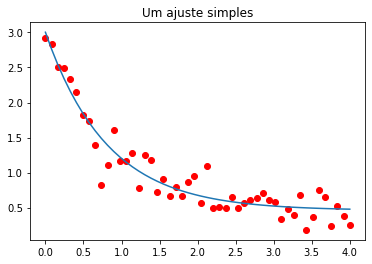

In [3]:
import numpy as np
from scipy.optimize import curve_fit
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt

#definindo a função ou modelo a ser ajustado
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

#simulando um conjunto de dados
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
ydata = y + 0.2 * np.random.normal(size=len(xdata))

#fazendo o ajuste
popt, pcov = curve_fit(func, xdata, ydata)

plt.plot(xdata, ydata,'ro')
plt.plot(xdata, func(xdata,popt[0],popt[1],popt[2]))
plt.title('Um ajuste simples')
plt.show()

## Ajuste de polinomios

In [5]:
import numpy as np

# dados a serem ajustados

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])

# ajustando um polinomio de ordem 3
z = np.polyfit(x, y, 3)

# printa os coeficientes
print (z)

[ 0.08703704 -0.81349206  1.69312169 -0.03968254]


In [7]:
# função de conveniência para calculo com polinomios
p = np.poly1d(z)
print (p(0.5), p(3.5))

0.614384920634922 -0.3473214285714268


/home/hmonteiro/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


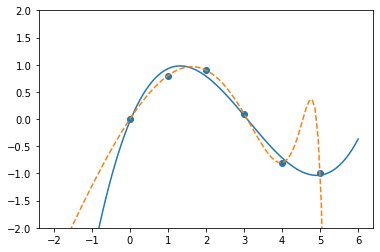

In [8]:
import matplotlib.pyplot as plt

# ajustando um polinomio de grau alto
p30 = np.poly1d(np.polyfit(x, y, 30))

# plotando os resultados
xp = np.linspace(-2, 6, 100)

plt.scatter(x, y)
plt.plot(xp, p(xp), '-')
plt.plot(xp, p30(xp), '--')
plt.ylim(-2,2)
plt.show()


# Exercícios

1 - Pequenas nanopartículas de fuligem em suspensão em água começam a agregar quando o sal é adicionado. O raio r médio dos agregados deve crescer como uma lei de potência no tempo t de acordo com a equação $R = r_0t^N$. Tomando o logaritmo desta equação obtemos $ln(r) = n*ln(t) + ln(r_0)$. Com essa transformação, os dados devem cair em uma linha reta se $ln(r)$ é plotado vs $ln(t)$.

a) Criar um arquivo texto com os dados abaixo, importa-lo no notebook e plotar os dados em um gráfico de $ln(r)$ vs $ln (t)$ para ver se os dados caem aproximadamente em uma linha reta.

<pre>
Size of growing aggregate
Date: 19-Nov-2013
Data taken by M. D. Gryart and M. L. Waites
time (m)   size (nm)    error (nm)
  0.12        115         10
  0.18        130         12
  0.42        202         14
  0.90        335         18
  2.10        510         20
  6.00        890         30
 18.00       1700         40
 42.00       2600         50
</pre>

b) Definindo $y = \ ln (r)$ e $x = \ ln (t)$, escreva uma rotina de ajuste linear para ajustar os dados e encontrar os valores ideais para os parametros do modelo $y(t)$, bem como as suas incertezas. Use esses valores ajustados para encontrar os valores ideais de $r_0$ (a amplitude) e a potencia $N$ na função de ajuste $R = r_0t^N$. Quais são os valores ajustados de $r_0$ e $N$? Qual é o valor de $\chi_r ^ 2$? Será que uma lei de potência é um modelo adequado para os dados?





2 - Neste problema você criar uma rotina de ajuste de mínimos quadrados não-linear para ajustar os dados que, incluindo as incertezas nos valores de y, são fornecidos na tabela abaixo. Sua tarefa é ajustar a função

 $d (t) = A (1 + B \, \cos \omega t) e ^ {- t ^ 2/2 \tau ^ 2} + C$

aos dados, onde os parâmetros de ajuste são A, B, C, $\omega$, e $\tau$.

Escrever um programa Python que  
(i) lê os dados a partir de um arquivo,    
(ii) define uma função oscDecay(T, A, B, C, $\tau$, $\omega$) com a função de $d (T)$ acima, e   
(iii) produzir um gráfico dos dados e a função $d (t)$ ajustada.   

a) Escolha a parâmetros de ajuste A, B, C, tau, e omega para produzir um ajuste aproximado "a olho" aos dados. Você deve ser capaz estimar valores razoáveis para esses parâmetros só de olhar para os dados e pensando sobre o comportamento de d (t). Por exemplo, $d (0) = A (1 + B) + C$ enquanto $d (\infty) = C$. Qual o parâmetro  em $d(t)$ controla o período dos picos observados nos dados? Use essas informações para estimar o valor desse parâmetro.

b) Escrever um programa usando a função scipy.optimize.curve_fit para ajustar os dados e, assim, encontrar os valores ideais dos parâmetros de ajuste A, B, C, $\omega$, e $\tau$. Seu programa deve plotar os dados juntamente com a função ajustada usando os valores dos parâmetros ajustados. Escreva uma função para calcular o $\chi^2$ reduzido. Imprima o valor do $\chi^2$ reduzido  juntamente com os valores ideais dos parâmetros de ajuste. Você pode usar os resultados da parte (a) para estimar bons valores iniciais dos parâmetros de ajuste.

c) Depois de ter encontrado os parâmetros de ajuste ideais, execute o seu programa novamente usando como valores iniciais os valores ideais dos parâmetros A, B, C, e $\tau$, mas definindo o valor inicial de $\omega$ como 3 vezes o seu valor ideal . Você deve achar que o programa converge para um conjunto diferente de parâmetros de ajuste do que aqueles encontrados na parte (b). Faça um gráfico mostrando os dois ajustes. O segundo ajuste deve ser visivelmente pior. Qual é o valor do $\chi^2$ reduzido  para este ajuste? OBS: ele deve ser muito maior do que o que você encontrou para a parte (b). Explique.


<pre>Data for absorption spectrum
Date: 21-Nov-2012
Data taken by P. Dubson and M. Sparks
time (ms)  signal  uncertainty
  0.2      41.1       0.9
  1.4      37.2       0.9
  2.7      28.3       0.9
  3.9      24.8       1.1
  5.1      27.8       0.8
  6.4      34.5       0.7
  7.6      39.0       0.9
  8.8      37.7       0.8
 10.1      29.8       0.9
 11.3      22.2       0.7
 12.5      22.3       0.6
 13.8      26.7       1.1
 15.0      30.4       0.7
 16.2      32.6       0.8
 17.5      28.9       0.8
 18.7      22.9       1.3
 19.9      21.7       0.9
 21.1      22.1       1.0
 22.4      22.3       1.0
 23.6      26.3       1.0
 24.8      26.2       0.8
 26.1      21.4       0.9
 27.3      20.0       1.0
 28.5      20.1       1.2
 29.8      21.2       0.5
 31.0      22.0       0.9
 32.2      21.6       0.7
 33.5      21.0       0.7
 34.7      19.7       0.9
 35.9      17.9       0.9
 37.2      18.1       0.8
 38.4      18.9       1.1
 </pre>
 

OBS: Atividades baseadas no curso http://www.physics.nyu.edu/pine/pymanual/html/chap8/chap8_fitting.html